In [1]:
%matplotlib inline

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('talk')

# Time series analysis

## Random walk

In [5]:
np.random.seed(0)
xi = .1 * sns.distributions.stats.norm().rvs(size=(10000, 1000))

sst = xi.cumsum(axis=-1)
n = sst.shape[0]

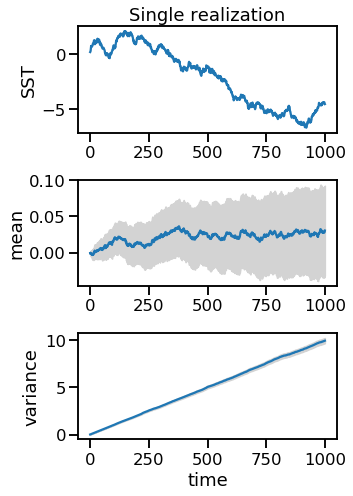

In [6]:
plt.figure(figsize=(5, 7))

plt.subplot(3, 1, 1)
plt.plot(sst[0])
plt.ylabel('SST')
plt.title('Single realization');

plt.subplot(3, 1, 2)
s_e = sst.std(axis=0, ddof=1) / np.sqrt(n)
t_distr = sns.distributions.stats.t(df=n-1)
plt.fill_between(
    x=np.arange(sst.shape[1]),
    y1=sst.mean(axis=0) + t_distr.ppf(0.975) * s_e,
    y2=sst.mean(axis=0) + t_distr.ppf(0.025) * s_e,
    color='lightgray'
)
plt.plot(sst.mean(axis=0))
plt.ylabel('mean')

plt.subplot(3, 1, 3)
s = sst.var(axis=0, ddof=1)
chi2 = sns.distributions.stats.chi2(df=n-1)
plt.fill_between(
    x=np.arange(sst.shape[1]),
    y1=s * (n - 1) / chi2.ppf(0.975),
    y2=s * (n - 1) / chi2.ppf(0.025),
    color='lightgray'
)
plt.plot(sst.var(axis=0))
plt.ylabel('variance')
plt.xlabel('time')

plt.tight_layout()
plt.savefig('../img/7_random_walk.svg', bbox_inches='tight', pad_inches=.1);

## AR1 process

In [7]:
np.random.seed(3)
xi = .1 * sns.distributions.stats.norm().rvs(size=(10000, 300))
a = .6
a2 = .99
sst = np.empty_like(xi)
sst2 = np.empty_like(xi)

sst[:, 0] = xi[:, 0]
sst2[:, 0] = xi[:, 0]
for i in range(1, xi.shape[-1]):
    sst[:, i] = a * sst[:, i - 1] + xi[:, i]
    sst2[:, i] = a2 * sst2[:, i - 1] + xi[:, i]
n = sst.shape[0]

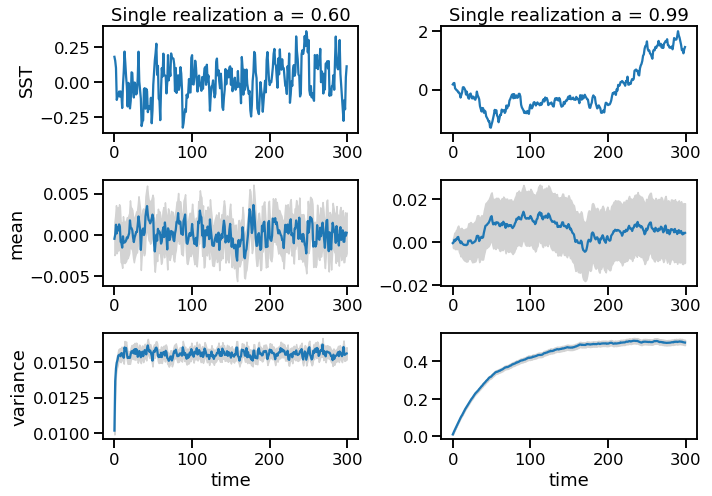

In [8]:
plt.figure(figsize=(10, 7))

plt.subplot(3, 2, 1)
plt.plot(sst[0])
plt.ylabel('SST')
plt.title('Single realization a = {:3.2f}'.format(a));

plt.subplot(3, 2, 3)
s_e = sst.std(axis=0, ddof=1) / np.sqrt(n)
t_distr = sns.distributions.stats.t(df=n-1)
plt.fill_between(
    x=np.arange(sst.shape[1]),
    y1=sst.mean(axis=0) + t_distr.ppf(0.975) * s_e,
    y2=sst.mean(axis=0) + t_distr.ppf(0.025) * s_e,
    color='lightgray'
)
plt.plot(sst.mean(axis=0))
plt.ylabel('mean')

plt.subplot(3, 2, 5)
s = sst.var(axis=0, ddof=1)
chi2 = sns.distributions.stats.chi2(df=n-1)
plt.fill_between(
    x=np.arange(sst.shape[1]),
    y1=s * (n - 1) / chi2.ppf(0.975),
    y2=s * (n - 1) / chi2.ppf(0.025),
    color='lightgray'
)
plt.plot(sst.var(axis=0))
plt.ylabel('variance')
plt.xlabel('time')

plt.subplot(3, 2, 2)
plt.plot(sst2[0])
plt.title('Single realization a = {:3.2f}'.format(a2));

plt.subplot(3, 2, 4)
s_e = sst2.std(axis=0, ddof=1) / np.sqrt(n)
t_distr = sns.distributions.stats.t(df=n-1)
plt.fill_between(
    x=np.arange(sst.shape[1]),
    y1=sst2.mean(axis=0) + t_distr.ppf(0.975) * s_e,
    y2=sst2.mean(axis=0) + t_distr.ppf(0.025) * s_e,
    color='lightgray'
)
plt.plot(sst2.mean(axis=0))

plt.subplot(3, 2, 6)
s = sst2.var(axis=0, ddof=1)
chi2 = sns.distributions.stats.chi2(df=n-1)
plt.fill_between(
    x=np.arange(sst2.shape[1]),
    y1=s * (n - 1) / chi2.ppf(0.975),
    y2=s * (n - 1) / chi2.ppf(0.025),
    color='lightgray'
)
plt.plot(sst2.var(axis=0))
plt.xlabel('time')
plt.tight_layout()
plt.savefig('../img/7_AR1.svg', bbox_inches='tight', pad_inches=.1);

## Autocorrelation function

In [3]:
np.random.seed(3)
xi = .1 * sns.distributions.stats.norm().rvs(size=(300))
a = .95
sst = np.empty_like(xi)
sst[0] = xi[0]

for i in range(1, xi.shape[-1]):
    sst[i] = a * sst[i - 1] + xi[i]
n = sst.shape[0]
t = np.arange(n)

In [148]:
def acf(x):
    N = x.shape[-1]
    lag = np.arange(N)
    r = np.empty_like(x)
    x_prime = x - x.mean()
    for l in lag:
        if l == 0:
            r[..., l] = (x_prime * x_prime).sum(axis=-1)
        elif l == lag[-1]:
            r[..., l] = (x_prime[..., 0] * x_prime[..., -1]).sum(axis=-1)
        else:
            r[..., l] = (x_prime[..., :-l] * x_prime[..., l:]).sum(axis=-1)
    r /= r[..., 0:1]
    return r

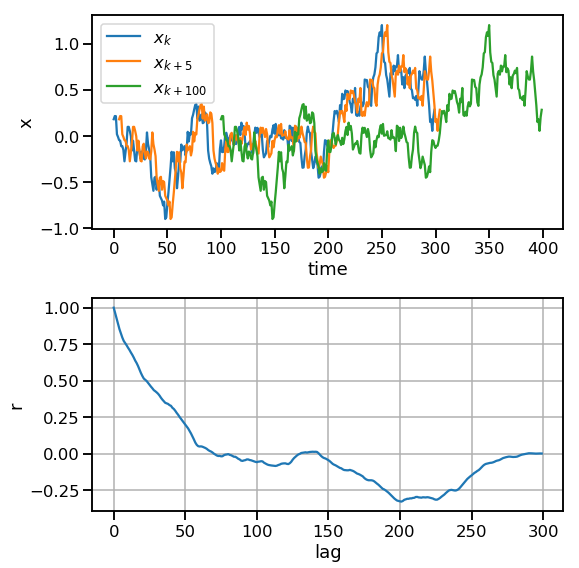

In [149]:
plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
sns.lineplot(t, sst, label='$x_k$').set_xlabel('time');
sns.lineplot(t+5, sst, label='$x_{k+5}$');
sns.lineplot(t+100, sst, label='$x_{k+100}$');
plt.ylabel('x')

plt.subplot(2, 1, 2)
sns.lineplot(t, acf(sst)).set_xlabel('lag')
plt.grid()
plt.ylabel('r');

plt.tight_layout()

plt.savefig('../img/7_ACF_1.svg', bbox_inches='tight', pad_inches=.1);

In [150]:
np.random.seed(3)
xi = .1 * sns.distributions.stats.norm().rvs(size=(30000))
a = .9
red = np.empty_like(xi)

red[0] = xi[0]
for i in range(1, xi.shape[-1]):
    red[i] = a * red[i - 1] + np.sqrt(1-a**2)*xi[i]
n = red.shape[0]
t = np.arange(n)

sin = np.sin(t * 2 * np.pi / 100)

red_sin = sin + 10. * red

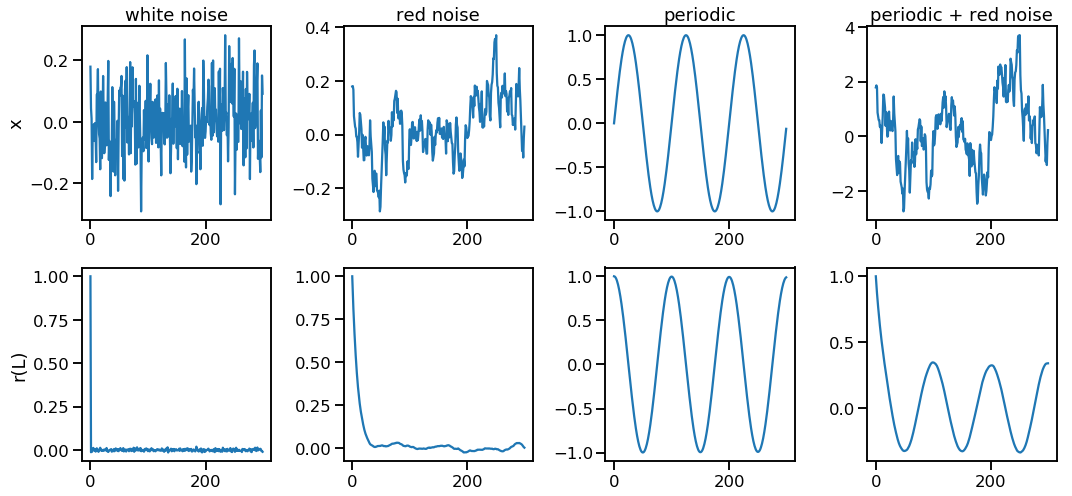

In [151]:
plt.figure(figsize=(15, 7))

titles = ('white noise', 'red noise', 'periodic', 'periodic + red noise')

sl = slice(300)

for i, (ti, f) in enumerate(zip(titles, (xi, red, sin, red_sin))):
    plt.subplot(2, len(titles), i+1)
    sns.lineplot(t[sl], f[sl])
    if i == 0: plt.ylabel('x')
    plt.title(ti)
    
    plt.subplot(2, len(titles), len(titles) + i + 1)
    sns.lineplot(t[sl], acf(f)[sl])
    if i == 0: plt.ylabel('r(L)')
plt.tight_layout()
plt.savefig('../img/7_ACF_2.svg', bbox_inches='tight', pad_inches=.1);

In [152]:
np.random.seed(3)
xi = .1 * sns.distributions.stats.norm().rvs(size=(30000))
a = np.array([.95, .9, .8, 0.])
x = np.empty((len(a), len(xi)))

x[:, 0] = xi[0]
for i in range(1, xi.shape[-1]):
    x[:, i] = a * x[:, i - 1] + np.sqrt(1-a**2)*xi[i]
n = x.shape[1]
t = np.arange(n)

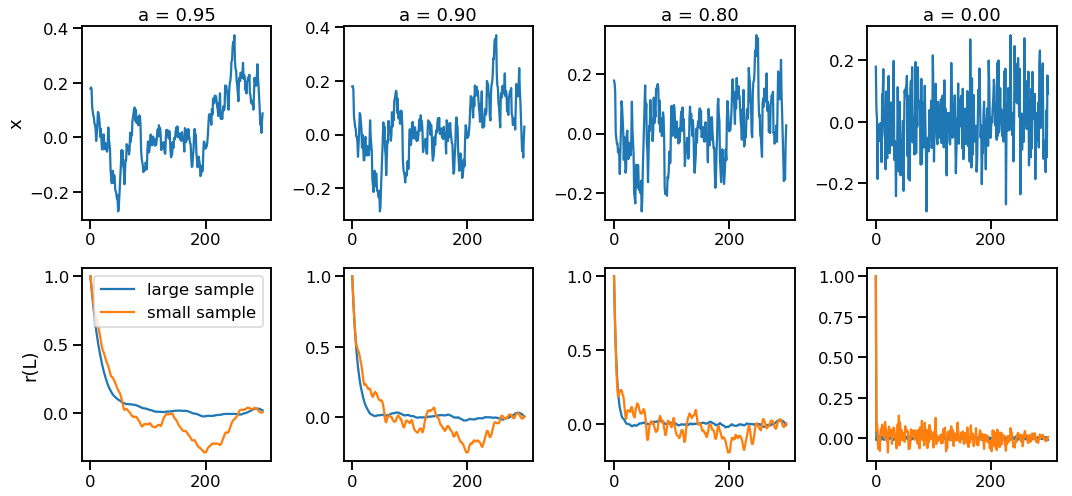

In [153]:
plt.figure(figsize=(15, 7))

r_300 = acf(x[:, :300])
r = acf(x)
sl = slice(300)

for i, al in enumerate(a):
    plt.subplot(2, len(a), i+1)
    sns.lineplot(t[sl], x[i, sl])
    if i == 0: plt.ylabel('x')
    plt.title('a = {:3.2f}'.format(a[i]))
    
    plt.subplot(2, len(a), len(a) + i + 1)
    sns.lineplot(t[sl], r[i, sl])
    sns.lineplot(t[sl], r_300[i, sl])
    if i == 0:
        plt.ylabel('r(L)')
        plt.legend(('large sample', "small sample"))

plt.tight_layout()
plt.savefig('../img/7_ACF_3.svg', bbox_inches='tight', pad_inches=.1);

In [174]:
np.random.seed(3)
xi = .1 * sns.distributions.stats.norm().rvs(size=(300))
a = .8
red = np.empty_like(xi)

red[0] = xi[0]
for i in range(1, xi.shape[-1]):
    red[i] = a * red[i - 1] + np.sqrt(1-a**2)*xi[i]
n = red.shape[0]
t = np.arange(n)

r = acf(red)

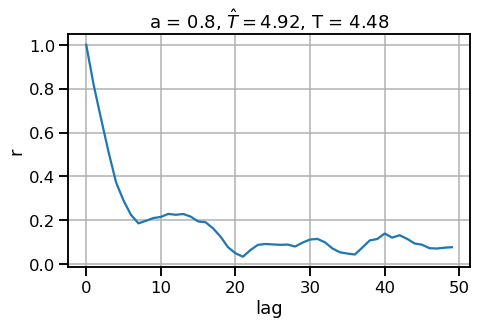

In [186]:
plt.figure(figsize=(7, 8))

sl = slice(50)
plt.subplot(2, 1, 1)
sns.lineplot(t[sl], r[sl])
plt.title('a = 0.8, $\hat{T} = $' + '{:3.2f}'.format(-1/np.log(r[1])) + ', T = {:3.2f}'.format(-1/np.log(a)))
plt.grid()
plt.ylabel('r')
plt.xlabel('lag')

plt.tight_layout()
plt.savefig('../img/7_ACF_4.svg', bbox_inches='tight', pad_inches=.1);

In [162]:
-1/np.log(a)

4.481420117724551

In [163]:
r.sum()

0.5

In [164]:
x = np.arange(300)
y = np.exp(-x / 4.48)

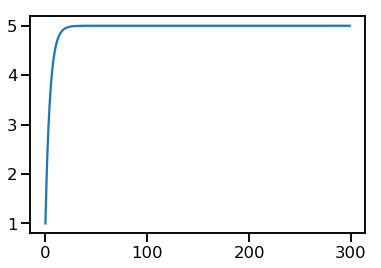

In [166]:
plt.plot(x, y.cumsum())